<a href="https://colab.research.google.com/github/alainray/ICLR2020/blob/master/ICLR2020_Keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Posters: 486
Spotlights: 99
Oral Presentations: 43


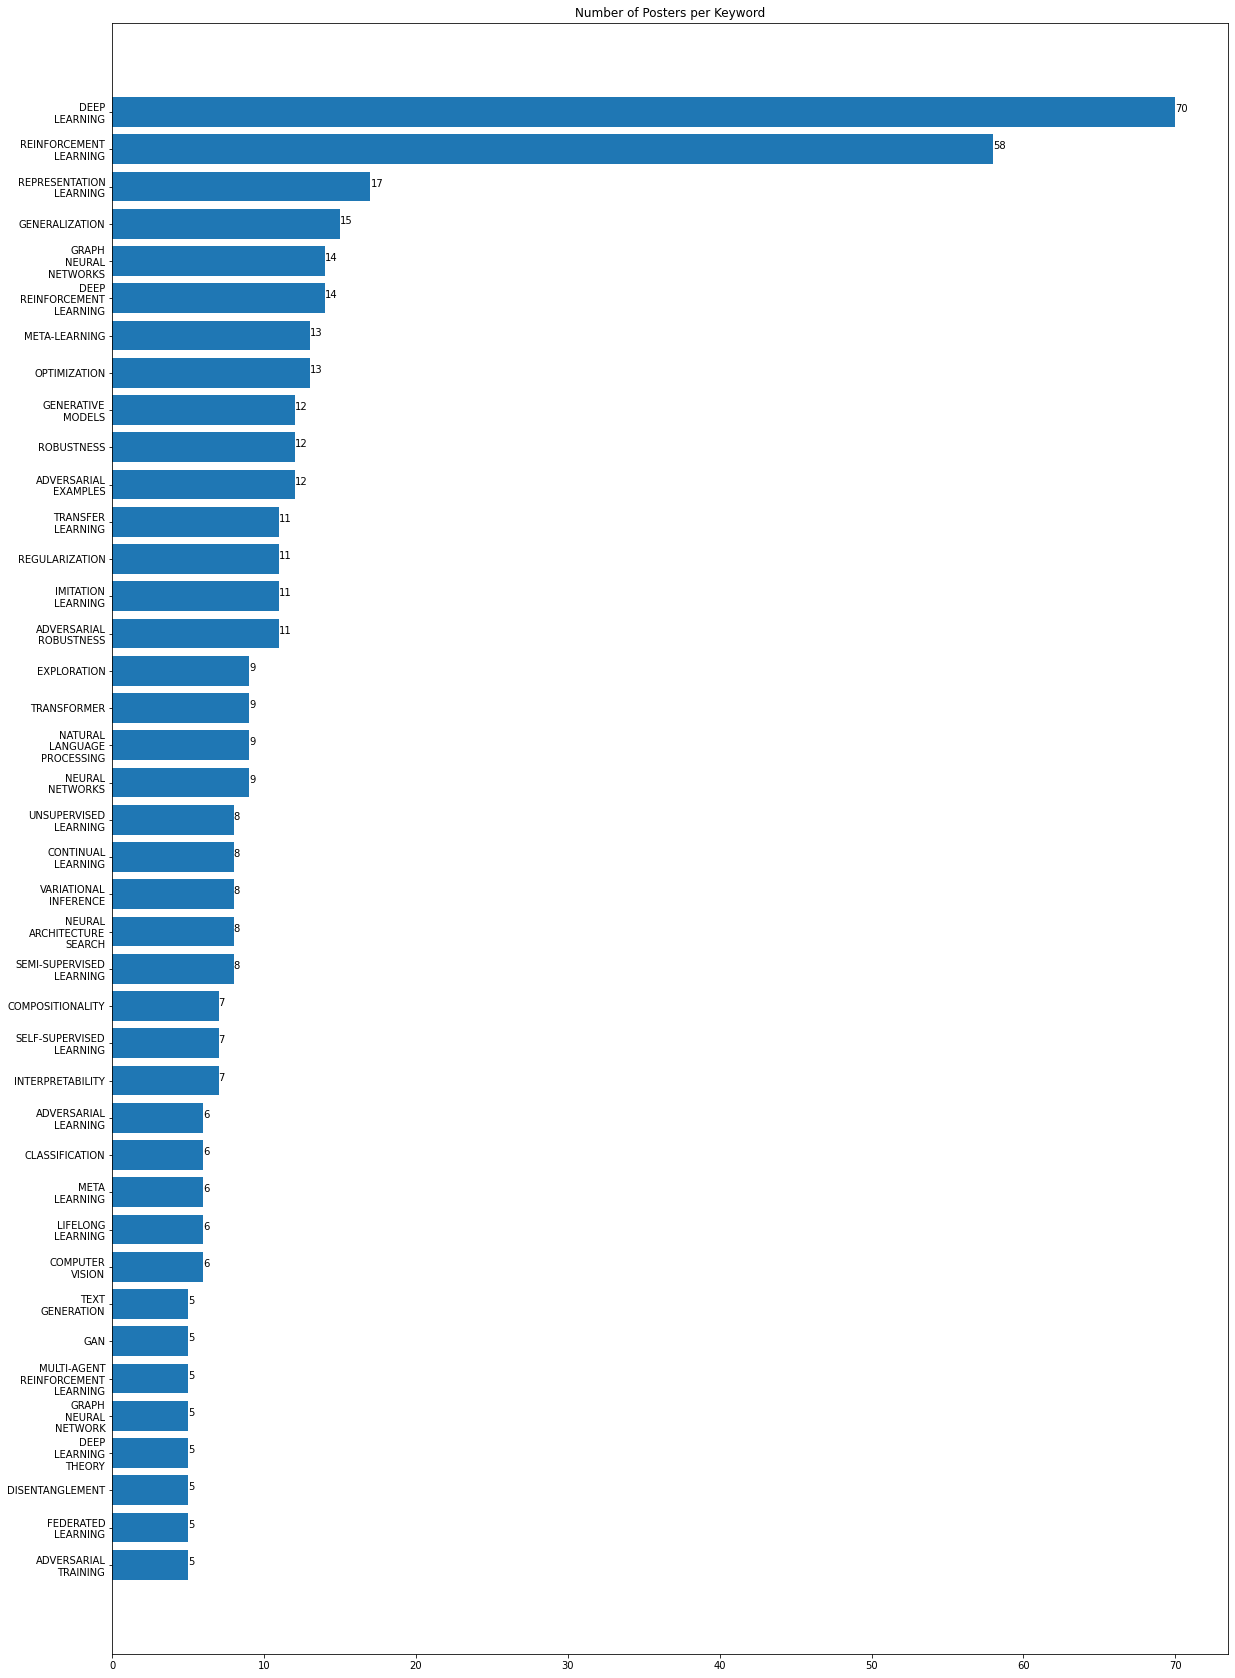

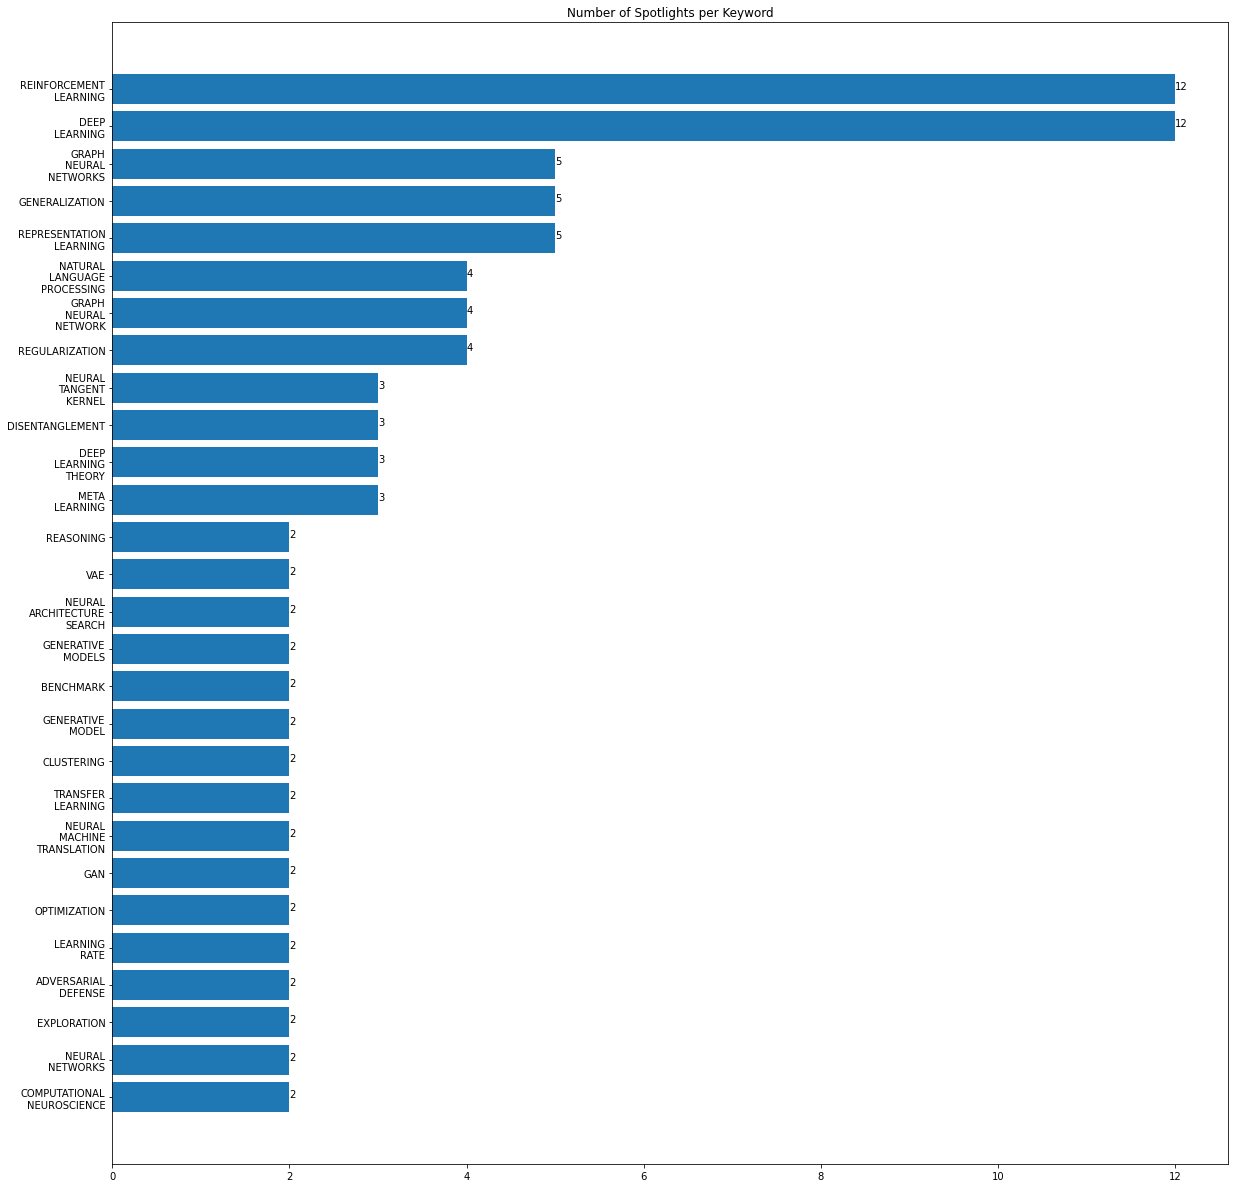

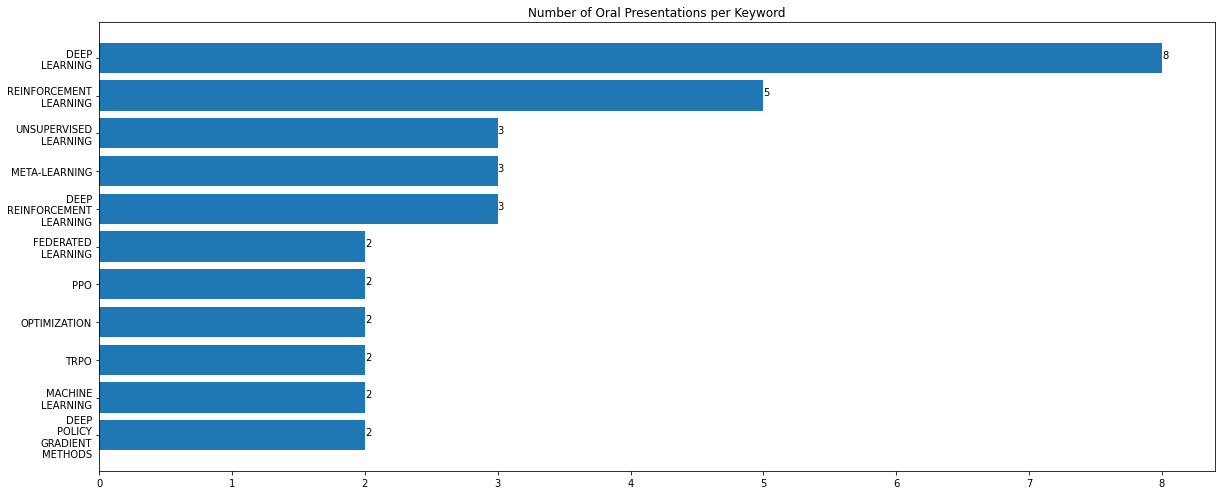

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
# Utility functions for handling:
# Plotting
# Parsing
# Simplification of diverse tags
def plot_tags(tags, n_tags, title="", n=None, bar_height=0.75):
    if n is None or n > len(tags):
        n = len(tags)
    tags = [tag.upper().replace(" ","\n") for tag in tags]
    tags = tags[:n][::-1]
    n_tags = n_tags[:n][::-1]
    plt.figure(figsize=(20,n*bar_height))
    plt.title("Number of {} per Keyword".format(title))
    #if n > 20:
    #    plt.xticks(rotation='vertical')
    plt.barh(tags, n_tags)
    for index, value in enumerate(n_tags[:n]):

        plt.text(value, index,  str(value))

# This serves to coalesce all keywords below a threshold to the "Others" keyword
def coalesce_tags(tags, n_tags, threshold=1):
    new_tags = []
    new_n_tags = []
    counter = 0
    for t, n_t in zip(tags, n_tags):
        if n_t > threshold:
            new_tags.append(t)
            new_n_tags.append(n_t)
        else:
            counter += n_t
    new_tags.append("Others")
    new_n_tags.append(counter)

    return new_tags, new_n_tags

# I just find lines with "Keyword" on it, then do basic string manipulation 
# to arrive at the keywords
def get_tags(filename):
    with open(filename, 'r') as file:
        data = file.readlines()

    pattern = "      o *Keywords:* "
    parse = [line.replace("\n","").replace(pattern,"").split(",") for line in data if "Keyword" in line]
    n_papers = len(parse)
    for tags in parse:
        for i,t in enumerate(tags):
            tags[i] = t.lower().strip()

    final_tags = list(itertools.chain.from_iterable(parse))
    classes, freq = np.unique(final_tags,return_counts=True)
    f = sorted(freq)
    return classes[freq.argsort()], f, n_papers

# Main program starts

# files: These are simply text dumps of the OpenReview page for each type of paper
# https://openreview.net/group?id=ICLR.cc/2020/Conference#accept-talk

show_others = False # Set to True if you want to include "Others" in bar charts
files = ['iclr2020_posters.txt', 'iclr2020_spotlights.txt','iclr2020_oral.txt']
titles = ['Posters','Spotlights', 'Oral Presentations']
start = 0 if show_others else 1
paper_counts = dict()
max_keywords_to_display = 40
for f,t in zip(files, titles):
    tags, freq, paper_counts[t] = get_tags(f)
    tags, freq = coalesce_tags(tags, freq)
    plot_tags(tags[::-1][start:], freq[::-1][start:], t, max_keywords_to_display)

for k, v in paper_counts.items():
    print("{}: {}".format(k,v))